In [ ]:
## imports

import pandas as pd
import nltk
from pypdf import PdfReader
from sentence_transformers import SentenceTransformer
from embeddings import * 

# Clustering

## Getting the correct data & embedding each word

In [5]:
## find top 5,000 nouns and verbs by frequency
reader = PdfReader("all_top_words.pdf")
text = ""

for page in reader.pages:
    text += page.extract_text()

lines = text.split("\n")

vocab = []

for line in lines[4:3009] + lines[3012:]: ## (skipping readme lines)
    words_on_line = line.split(" ")
    vocab.append(words_on_line[0])

## embed top 5,000 words in target language using embeddings.py
model = SentenceTransformer("distiluse-base-multilingual-cased-v1") ## load semantic embed model
words_and_vecs = []

for word in vocab:
    words_and_vecs.append((word, get_semantic_embedding(word, model)))

print(words_and_vecs[:3])

[('abandon', [0.02009648270905018, -0.03218023106455803, -0.030821779742836952, -0.03648429736495018, -0.06113017350435257, -0.061205312609672546, 0.0022092845756560564, -0.05215407535433769, -0.009815630502998829, -0.04876004531979561, -0.034922510385513306, -0.040736906230449677, -0.016998862847685814, 0.011789573356509209, 0.0478660874068737, -0.01641954854130745, 0.016346128657460213, -0.018096648156642914, -0.0018247074913233519, -0.014749952591955662, 0.008438128046691418, 0.05342534929513931, 0.05154244229197502, -0.031075207516551018, 0.013614152558147907, 0.053158294409513474, 0.014288648962974548, 0.005325114354491234, -0.07284092158079147, -0.005256850738078356, -0.05892394110560417, -0.03444608300924301, 0.01961033046245575, -0.019640887156128883, -0.0482112392783165, -0.05623484030365944, -0.025146881118416786, -0.04750848934054375, -0.006465787533670664, 0.06586973369121552, 0.006257434841245413, -0.013899218291044235, 0.004441710654646158, -0.058783646672964096, 0.027529

## Compute inertia

In [ ]:
## more imports
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
## compute intertia
data = [y.tolist() for (x,y) in words_and_vecs]

inertias = []

for i in range(1,100):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

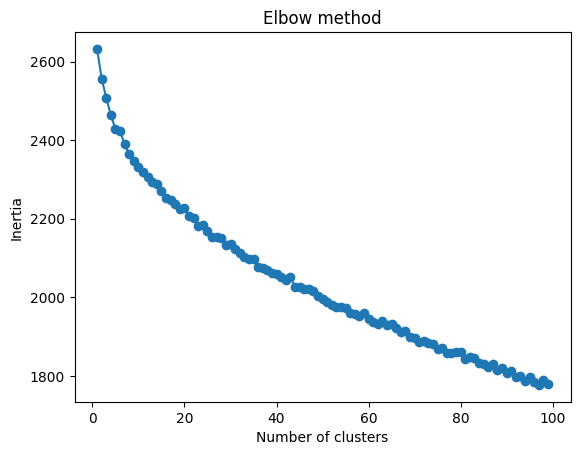

In [ ]:
plt.plot(range(1,100), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
## cluster based on intertia computed
kmeans = KMeans(n_clusters=100, random_state=42)
labels = kmeans.fit_predict(data)

In [22]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import umap

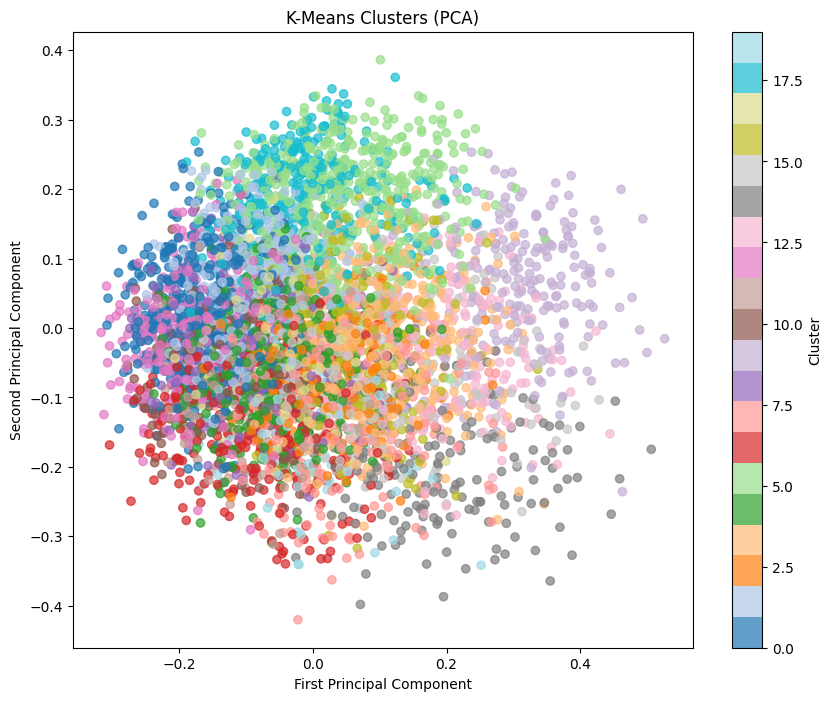

In [24]:
pca = PCA(n_components=2, random_state=42)
data_2d = pca.fit_transform(data)

plt.figure(figsize=(10, 8))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='tab20', alpha=0.7)
plt.colorbar(label='Cluster')
plt.title('K-Means Clusters (PCA)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [25]:
clusters = {}
for cluster_id in range(20):
    cluster_indices = np.where(labels == cluster_id)[0]
    clusters[cluster_id] = [vocab[i] for i in cluster_indices]

# Print all clusters
for cluster_id, words in clusters.items():
    print(f"Cluster {cluster_id}: {words}")

Cluster 0: ['agenda', 'aircraft', 'airline', 'alarm', 'album', 'app', 'architecture', 'art', 'article', 'artificial', 'artist', 'artistic', 'athlete', 'author', 'background', 'band', 'basketball', 'battery', 'bike', 'biology', 'blog', 'body', 'book', 'button', 'cable', 'camera', 'car', 'card', 'cartoon', 'category', 'CD', 'celebrity', 'cell', 'channel', 'chapter', 'character', 'chart', 'chat', 'chemical', 'chemistry', 'cinema', 'classic', 'classical', 'click', 'clothes', 'clothing', 'code', 'column', 'comedy', 'communicate', 'communication', 'computer', 'concert', 'construction', 'contact', 'content1', 'context', 'conversation', 'copy', 'course', 'cultural', 'culture', 'custom', 'data', 'decorate', 'decoration', 'description', 'design', 'desk', 'device', 'diagram', 'dialogue', 'diary', 'dictionary', 'digital', 'disc', 'discuss', 'discussion', 'document', 'documentary', 'download', 'drama', 'drawing', 'dressed', 'DVD', 'edition', 'education', 'educational', 'electric', 'electrical', 'el